# Load Packages

In [58]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt

# Load Data

In [59]:
df = pd.read_csv("../../data/processed/extended_features/training_outlier_removed.csv", sep="\t")

# Filter Columns

In [60]:
y = df['ActualTOW']
X = df.select_dtypes(include='number').drop(columns=['ActualTOW'])

# Standarization

In [61]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA

In [62]:
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)

# Wariantion Plot

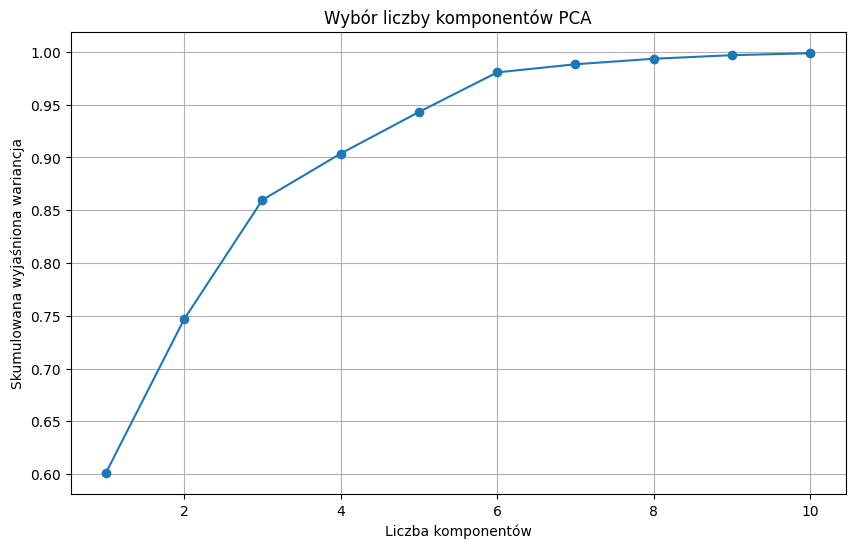

In [63]:
plt.figure(figsize=(10,6))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel("Liczba komponentów")
plt.ylabel("Skumulowana wyjaśniona wariancja")
plt.title("Wybór liczby komponentów PCA")
plt.grid()
plt.show()

# PCA Columns

In [64]:
pca_columns = [f"PCA_{i+1}" for i in range(X_pca.shape[1])]
df_pca = pd.DataFrame(X_pca, columns=pca_columns)

# Merge with Orginal DF

In [65]:
df_final = pd.concat([df_pca,y], axis=1)

# Save Reslut

In [66]:
output_path = "../../data/processed/extended_features/PCA_extended_features.csv"
df_final.to_csv(output_path, index=False,sep="\t")